Imports and reading the data frame

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import mpl_axes_aligner
from pca import pca
from sklearn.cluster import KMeans
import yellowbrick.cluster
from yellowbrick.cluster import KElbowVisualizer
import flexcluster
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
data=pd.read_csv("D:\\fenny\\Customer_behaviour.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [4]:
data.shape

(99, 13)

In [5]:
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [6]:
df = data['Make'].value_counts()
df

SUV        19
Baleno     19
Creata     14
Ciaz       12
i20        12
City       10
Duster      7
Verna       4
Luxuray     2
Name: Make, dtype: int64

In [7]:
data.isna().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

Plotting the pie plot show us that only 2% of population own luxuray cars and only 4% own Verna. 

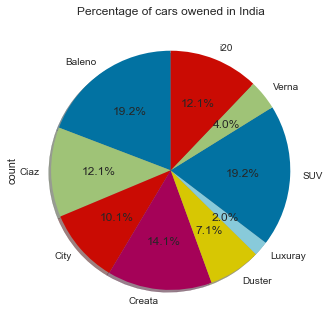

In [9]:
df = data.groupby(['Make'])['Make'].count().reset_index(name='count')


df.set_index('Make', inplace=True)


plot = df.plot.pie(y='count', title="Percentage of cars owened in India", legend=False, 
                   autopct='%1.1f%%',
                   shadow=True, startangle=90,pctdistance = 0.6)
#plt.figure(figsize=(5000,4000))

plt.show()

The bar plot shows the price of cars in India

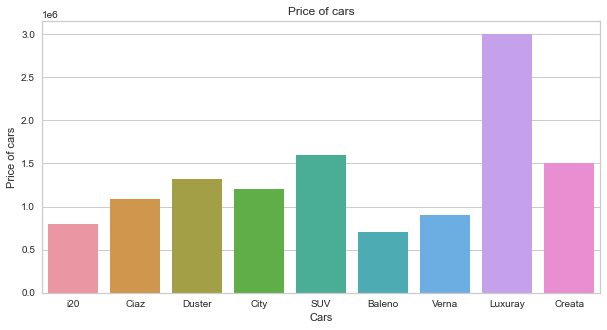

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Make',
            y = 'Price',
            data = data,errorbar=('ci', 0)).set(title='Price of cars',xlabel='Cars',ylabel='Price of cars')
plt.show()

The married population irrespective of their salaries are more likely to own the cars. The are the people with high salary who also own Luxuray cars.

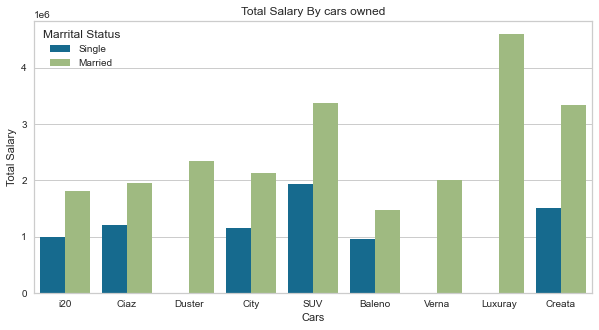

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Make',
            y = 'Total Salary',hue='Marrital Status',
            data = data,errorbar=('ci', 0)).set(title='Total Salary By cars owned',xlabel='Cars',ylabel='Total Salary')
plt.show()

High salaried professional are more likely to own luxuray cars. Where as all the other cars are own by almost all categories of population. 

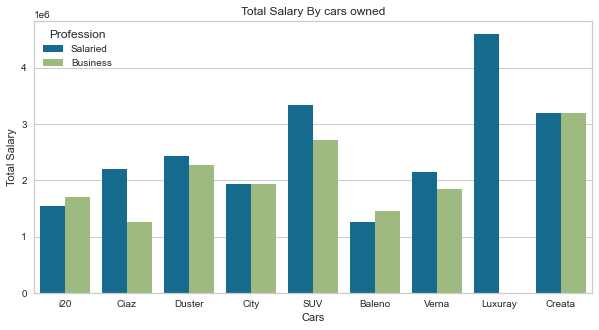

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Make',
            y = 'Total Salary',hue='Profession',
            data = data,errorbar=('ci', 0)).set(title='Total Salary By cars owned',xlabel='Cars',ylabel='Total Salary')
plt.show()

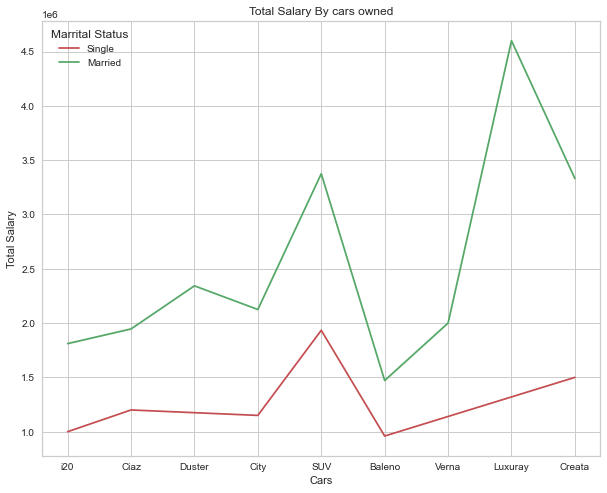

In [13]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Make', y='Total Salary', hue='Marrital Status',data=data,errorbar=('ci', 0),
             palette=['r', 'g','b']).set(title='Total Salary By cars owned',xlabel='Cars',ylabel='Total Salary')
sns.set_theme(style='white')

In [14]:
scaled=data

Standardizing variables

In [15]:
numeric_cols = scaled.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = scaled.select_dtypes('object').columns.tolist()
scaler = StandardScaler().fit(scaled[numeric_cols])
scaled[numeric_cols] = scaler.transform(scaled[numeric_cols])

One hot encoding

In [16]:

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(scaled[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
scaled[encoded_cols] = encoder.transform(scaled[categorical_cols])





In [17]:
scaled=scaled.drop(scaled.columns[[1,2,3,5,6,7,11,13,15,17,19,21,23,25,26,27,28,29,30,31,32,33]], axis=1)

Building the clustering model

In [19]:
SSE = []

for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled)
    SSE.append(kmeans.inertia_)



Visualizing the model's performance:

We can see that the optimal number of clusters is 3.

Text(0, 0.5, 'Inertia')

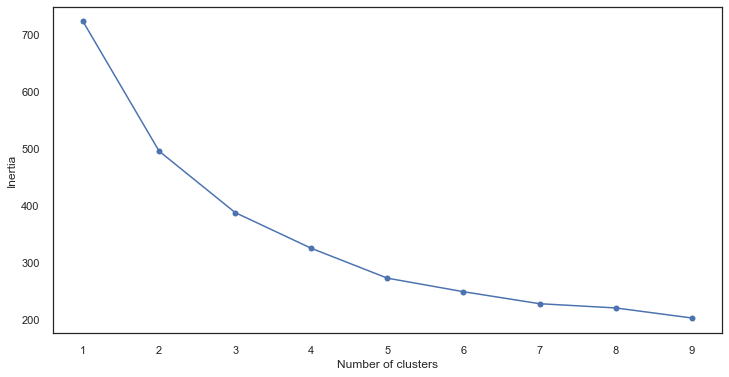

In [20]:
# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Silhouette coefficient

A silhouette coefficient, or a silhouette score is a metric used to evaluate the quality of clusters created by the algorithm.

Silhouette scores range from -1 to +1. The higher the silhouette score, the better the model.

In [21]:
# First, build a model with 3 clusters

from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(scaled)


# Now, print the silhouette score of this model

print(silhouette_score(scaled, kmeans.labels_, metric='euclidean'))

0.2518893931346743


silhouette score shows us that the model isn't performing too well. Now, lets create a new model that has better cluster separability than this one.

Building clustering model #2
For this model, lets do some feature selection.

We can use a technique called Principal Component Analysis (PCA).

In [22]:
pca = PCA(n_components=12)
principalComponents = pca.fit_transform(scaled)

features = range(pca.n_components_)






Based on this visualization, we can see that the first two PCA components explain around 70% of the dataset variance.

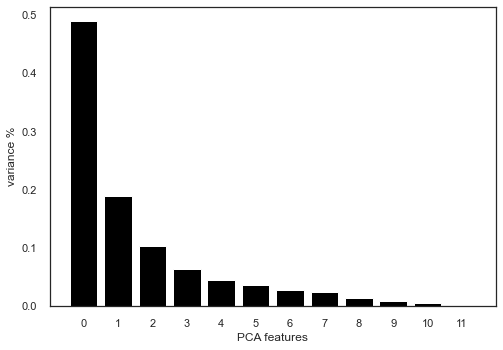

In [23]:
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

Lets build the model again with the first two principal components, and decide on the number of clusters to use:

In [24]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:2])
    inertias.append(model.inertia_)



Optimal no of cluster is 3

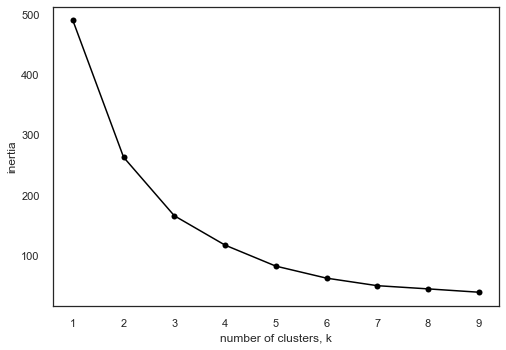

In [25]:
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

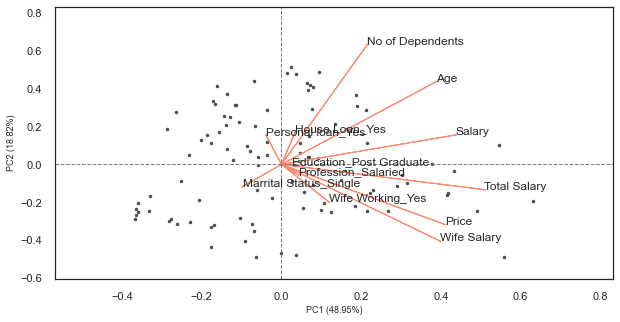

In [26]:
loadings=pca.components_

dfScores   = pd.DataFrame(principalComponents,columns=['PC'+str(i) for i in range(1,scaled.shape[1]+1)])

from bioinfokit.visuz import cluster
cluster.biplot(cscore=principalComponents, loadings=loadings, labels=scaled.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

The silhouette score of this model is better than the previous model we created.

In [27]:
model = KMeans(n_clusters=3)
model.fit(PCA_components.iloc[:,:2])

# silhouette score
print(silhouette_score(PCA_components.iloc[:,:2], model.labels_, metric='euclidean')) 

0.40493132853319186


In [28]:
data=pd.read_csv("D:\\fenny\\Customer_behaviour.csv")
pred = model.predict(PCA_components.iloc[:,:2])
frame = pd.DataFrame(data)
frame['cluster'] = pred

frame.loc[frame['cluster'] == 0, 'cluster'] = 3

frame.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,cluster
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,2
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,3
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,3
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,3
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,3


Cluster Analysis

Now that we're done building these different clusters, lets try to interpret them and look at the different customer segments.

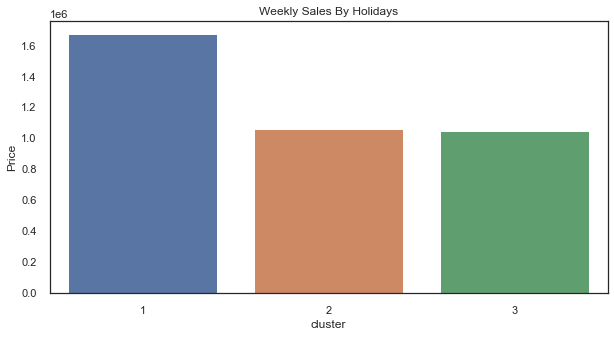

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'cluster',
            y = 'Price',
            data = data,errorbar=('ci', 0)).set(title='Weekly Sales By Holidays')
plt.show()

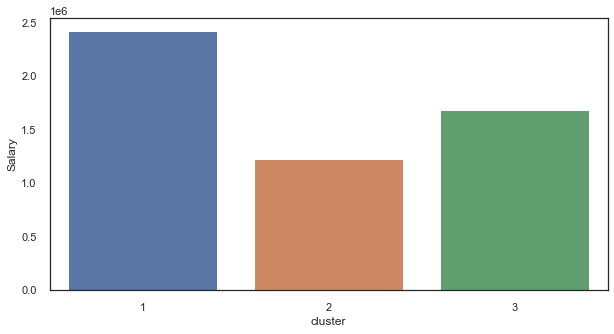

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'cluster',
            y = 'Salary',
            data = data,errorbar=('ci', 0))
plt.show()

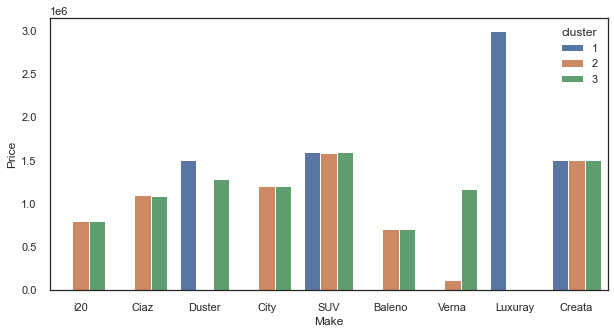

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Make',
            y = 'Price',hue='cluster',
            data = data,errorbar=('ci', 0))
plt.show()

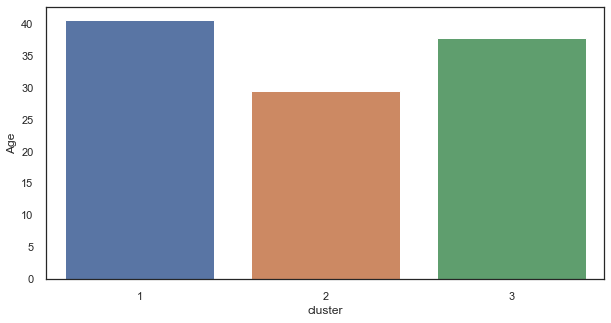

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'cluster',
            y = 'Age',
            data = data,errorbar=('ci', 0))
plt.show()